# Example system: LMS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pydaptivefiltering as pdf

In [2]:
def complex_randn(n):
    """
    Return a length-`n` vector of iid complex samples X with E|X|^2=1
    """
    return (np.random.randn(n) + np.random.randn(n)*1j) / np.sqrt(2)

__Types__

`None -> '(Filter, dictionary["outputs", "errors", "coefficients"])'`

Example for the LMS algorithm, SignData and SignError.

## Parameters

Number of iterations:

In [3]:
K = 500
H = np.array([0.32+0.21*1j, -0.3+0.7*1j, 0.5-0.8*1j, 0.2+0.5*1j])

Unknown system:

In [4]:
Wo = H

Noise power:

In [5]:
sigman2 = 0.04

No. of coefficients of the adaptive filter:

In [6]:
N = 4

Convergence factor (step) ($0 < \mu < 1$)

In [7]:
step = 0.002

Tolerance: If $\left|\mbox{error}\right| < \mbox{tol}$, stops at the current run.

In [8]:
tol = 0.0

## Initializing

In [9]:
W = np.ones(shape=(N, K+1))

In [10]:
x = complex_randn(K)

Complex noise:

In [11]:
n = np.sqrt(sigman2) * complex_randn(K)
d = np.convolve(Wo.conj(), x)[:K]

Desired signal:

In [12]:
d += n

## Instanciating `AdaptiveFilter`

In [13]:
Filter = pdf.AdaptiveFilter(W[:, 1])

### LMS

In [14]:
Output = pdf.LMS.LMS(Filter, d, x, step, tolerance=tol)

Run 0	 |error| = 1.6	 Time: 17.2 ms
Run 5	 |error| = 0.15	 Time: 76.1 ms
Run 10	 |error| = 0.15	 Time: 79.1 ms
Run 15	 |error| = 0.15	 Time: 75.5 ms
Run 20	 |error| = 0.15	 Time: 74.3 ms
Run 24	 |error| = 0.15	 Time: 58.9 ms
 
Total runtime 3.82e+02 ms


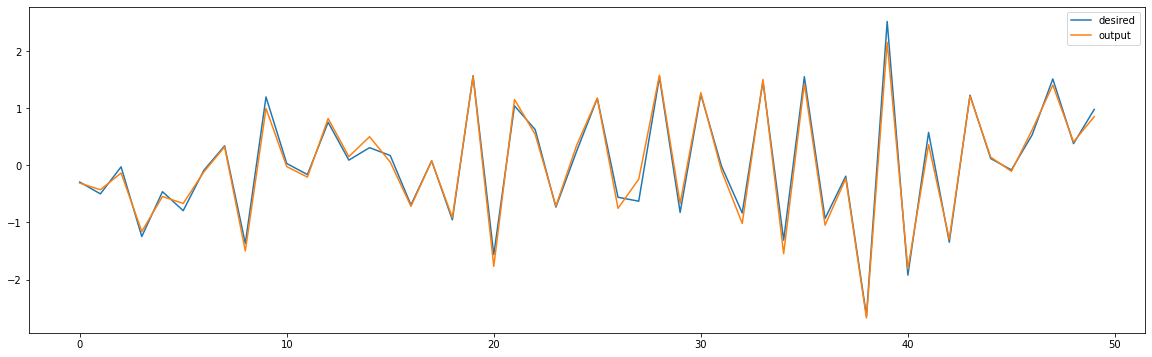

In [15]:
plt.figure(figsize=(20,6))
plt.plot(d.real[:50], label='desired')
plt.plot(Output["outputs"].real[:50], label='output')
plt.legend();

Coefficients:

In [16]:
coefs = np.array(Output["coefficients"])

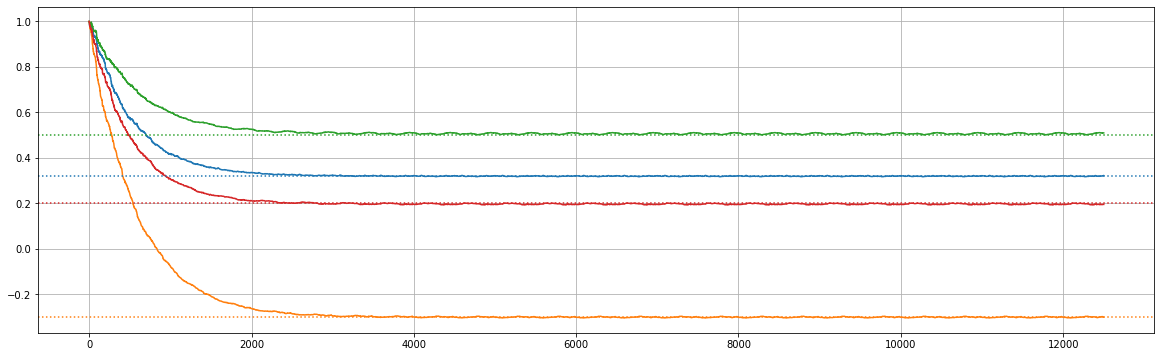

In [17]:
plt.figure(figsize=(20,6))
plt.plot(coefs.real)
for i, h in enumerate(H):
    plt.axhline(h.real, color=f'C{i}', linestyle=":")
plt.grid();

In [18]:
system_distance = np.linalg.norm(coefs - H, axis=1)

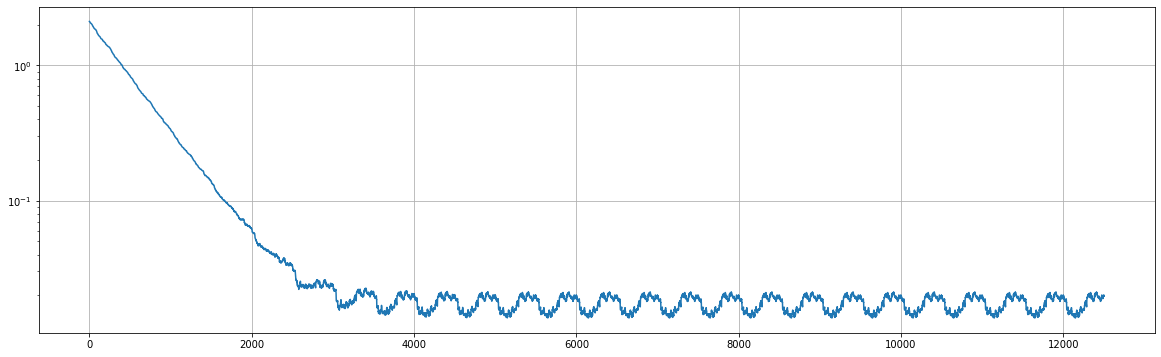

In [19]:
plt.figure(figsize=(20,6))
plt.semilogy(system_distance)
plt.grid();